## INTRODUCTION IMAGES

In [1]:
# General
import glob
import re
import os.path
import warnings
# warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import copy

# Arrays & Displays
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import pandas as pd
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap

# Data treatment
from datetime import datetime
from scipy.optimize import curve_fit

# Statistics
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, neighbors
from pykalman import KalmanFilter

# Default parameters
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

In [1]:
PRMS = {
    'sav_fgs':        False,
}

PTHS = {
    'sav_dir':         '/home/arthur/results/TCsLifeMonitFromObs/PRJCT_TIME_EVOLUTION/01_SAR_INTRO/'
}

In [15]:
def pol2cart(r, th):
    x = r * np.cos(th)
    y = r * np.sin(th)
    return x, y

def getColorMap(rgbFile="medspiration.rgb"):
    '''
    Load a RGB palette provided in ascii file
    '''
    colors = []
    nbCol  =0
    for line in open( rgbFile ):
        r,g,b = [int(c) for c in line.split()]
        colors.append( [r/255.,g/255.,b/255.] )
        nbCol += 1
    return( mpl.colors.ListedColormap(colors, name="custom", N=nbCol) )

# Wind speed
palette = '/home/arthur/scripts/ck22model/PRJCT_RAD_SCAT_CK22_RMW/high_wind_speed.pal'
cwnd    = getColorMap(rgbFile=palette)

# Time
colors = [mpl.colors.to_rgb('k'), mpl.colors.to_rgb('orangered')] # first color is black, last is red
cm     = LinearSegmentedColormap.from_list("Custom", colors, N=20)

/tmp/ipykernel_6662/3315456830.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im           = ax.pcolormesh(x_sar / 1000, y_sar / 1000, ds['wind_speed'], cmap=cwnd, norm=normalizer)
/tmp/ipykernel_6662/3315456830.py:53: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im           = ax.pcolormesh(x_sar / 1000, y_sar / 1000, ds['wind_speed'], cmap=cwnd, norm=normalizer)
/tmp/ipykernel_6662/3315456830.py:85: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated ce

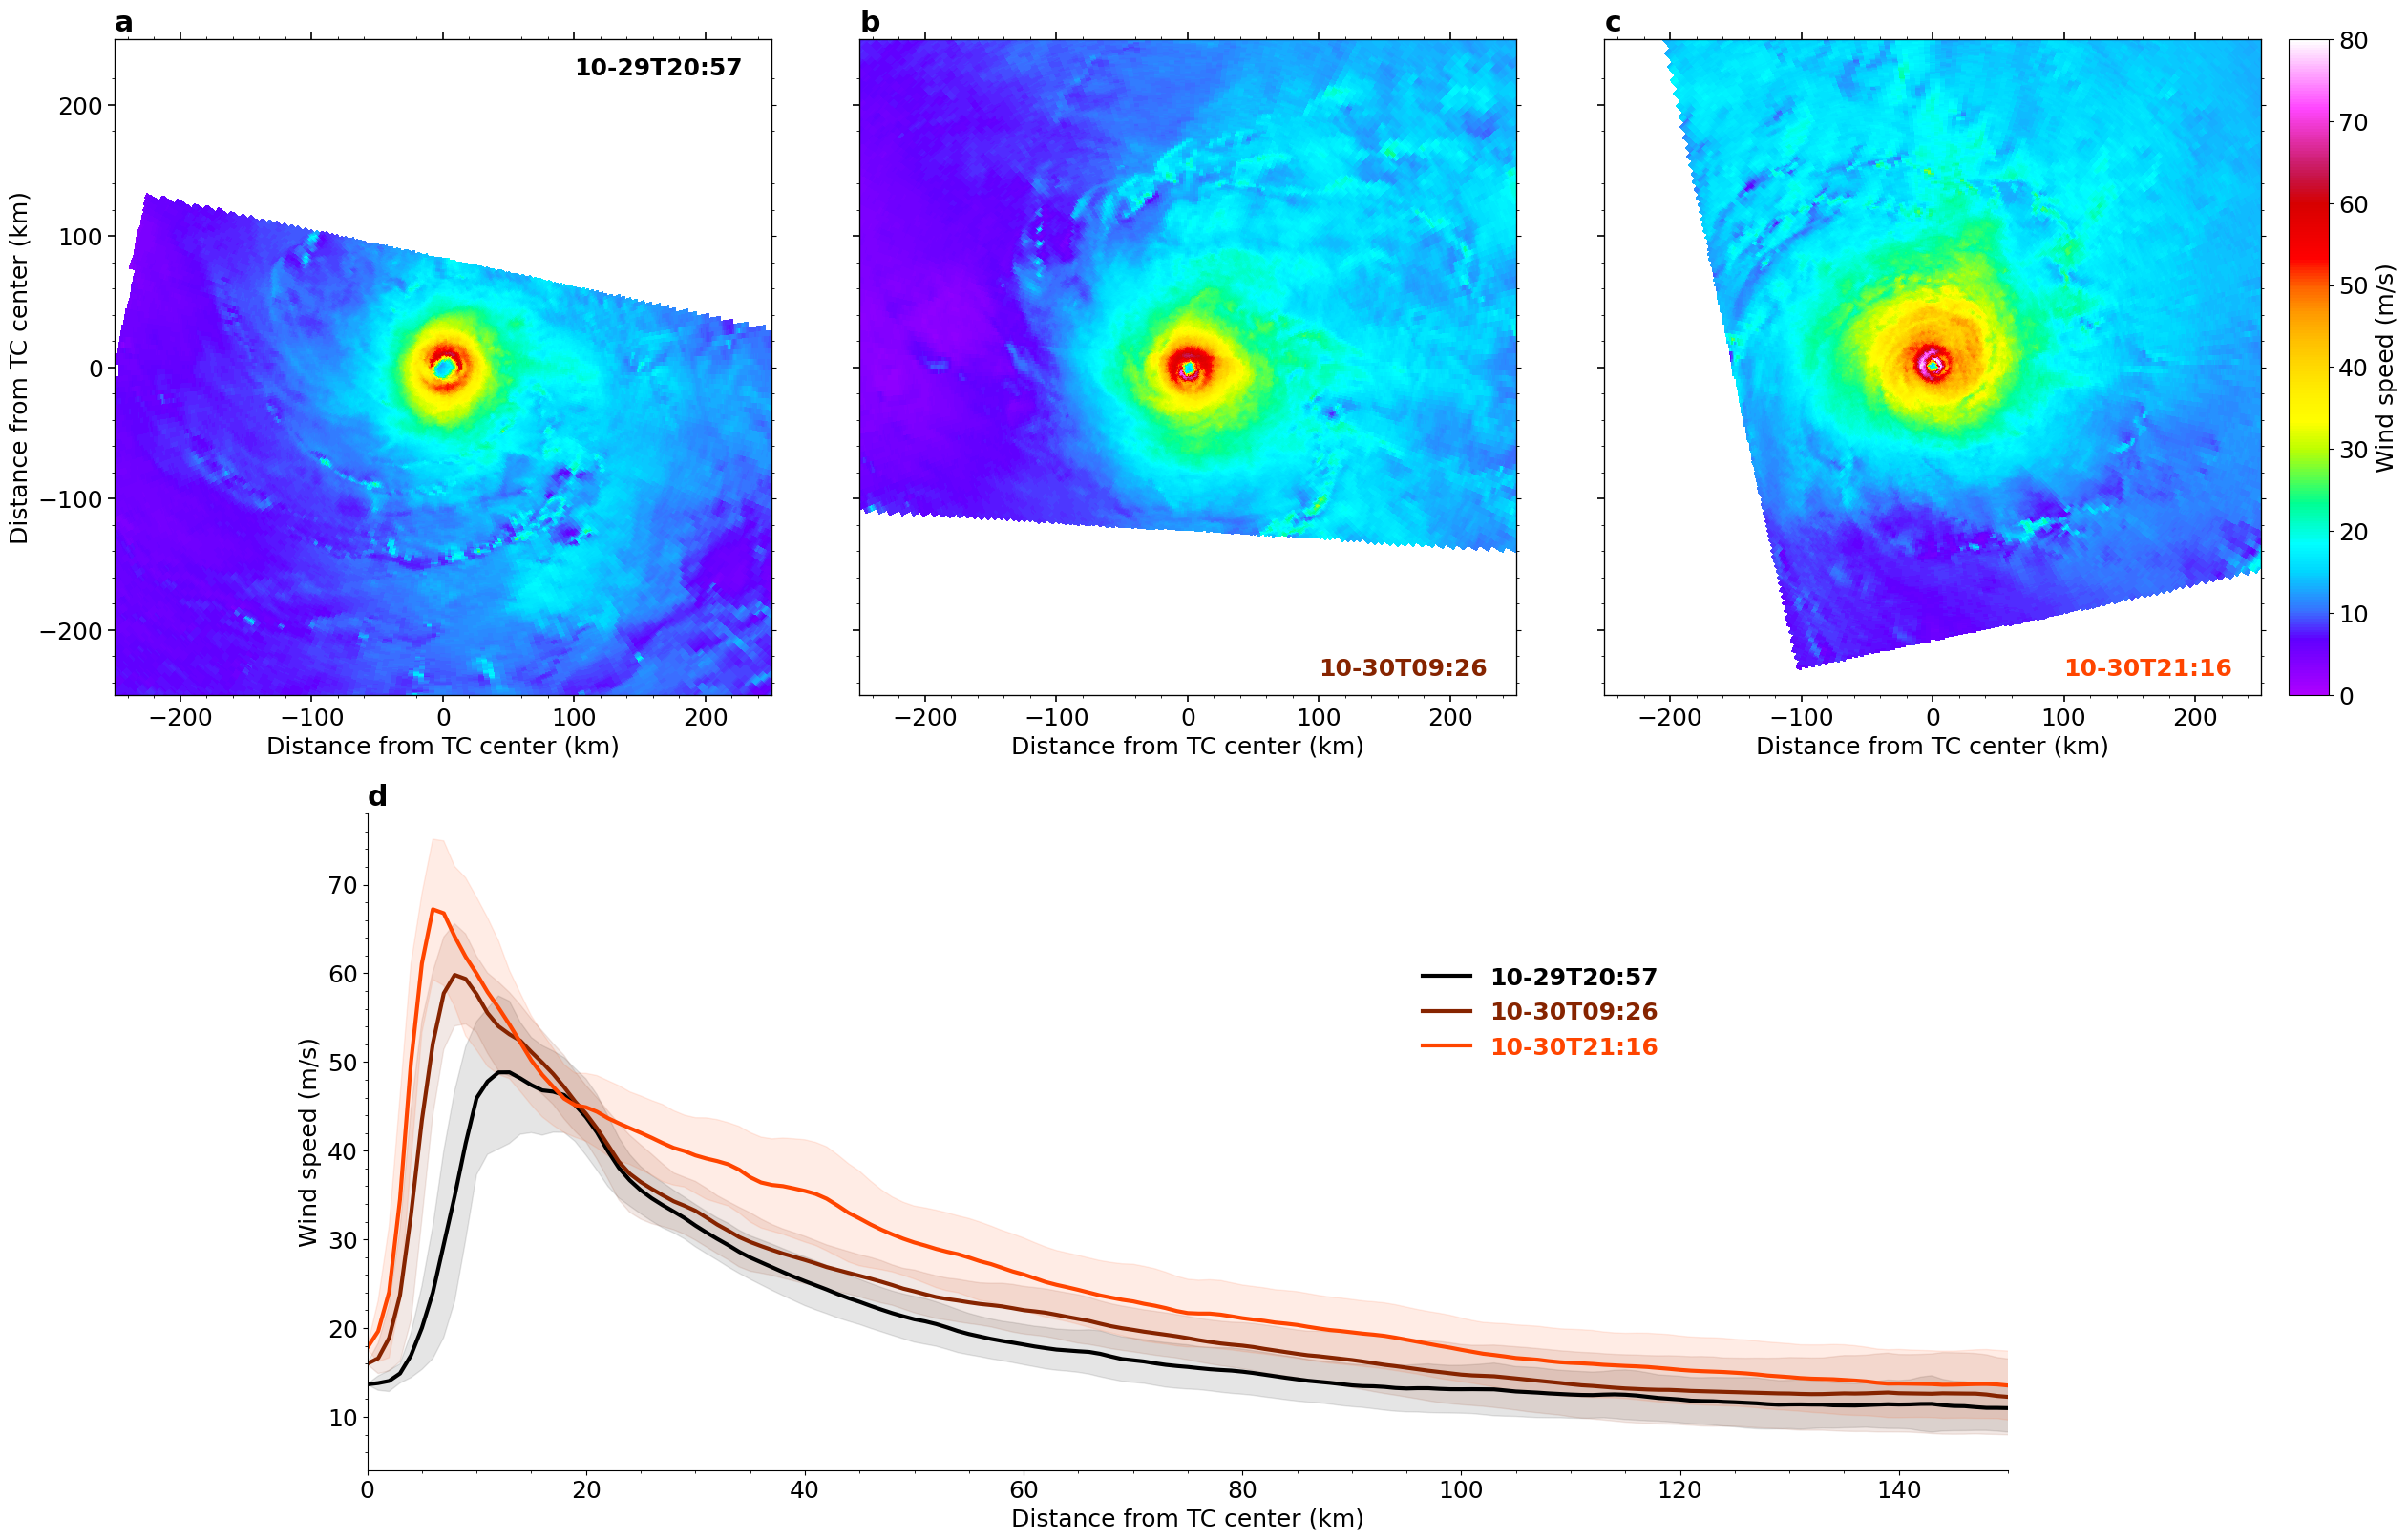

In [108]:
fig        = plt.figure(figsize=(30, 30))
gs         = GridSpec(3, 3, hspace=0.18, wspace=0.02)

cmap       = mpl.cm.get_cmap('PuOr') # Spectral

normalizer = Normalize(0, 80)
ax_lims2D  = 250

##########
# CASE 1 #
##########
p1 = '/home/arthur/data/cyclobs/centered_rotated_files_31012022/s1a-ew-owi-ca-20201029t205631-20201029t205758-000003-0415BC_sw_wp222020_cyclone.nc'
ds = xr.open_dataset(p1).isel(time=0)

### SAR
ax = fig.add_subplot(gs[:1, 0])
ax.set_title('a', weight='bold', loc='left')
ax.text(0.7, 0.945, '{}'.format(np.datetime_as_string(ds.time, unit='m')[5:]), transform = ax.transAxes, weight='bold', fontsize=18, c=cm(0))

y_sar, x_sar = pol2cart(ds['rad'], np.deg2rad(ds['theta']))
im           = ax.pcolormesh(x_sar / 1000, y_sar / 1000, ds['wind_speed'], cmap=cwnd, norm=normalizer)

ax.set_xlim(-ax_lims2D, ax_lims2D);ax.set_ylim(-ax_lims2D, ax_lims2D)
ax.set_xlabel('Distance from TC center (km)')
ax.set_ylabel('Distance from TC center (km)')
ax.set_box_aspect(1)
ax.tick_params(axis='both', length=5, width=1.2)
ax.minorticks_on()
# ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

ax2 = ax.twinx().twiny() 
ax2.set_xlim(-ax_lims2D, ax_lims2D);ax2.set_ylim(-ax_lims2D, ax_lims2D)
ax2.minorticks_on()
ax2.tick_params(axis='both', length=5, width=1.2)
ax2.set_box_aspect(1)
ax2.set_yticklabels([])
ax2.set_xticklabels([])


##########
# CASE 2 #
##########
p2 = '/home/arthur/data/cyclobs/centered_rotated_files_31012022/s1a-ew-owi-ca-20201030t092540-20201030t092711-000003-0415F8_sw_wp222020_cyclone.nc'
ds = xr.open_dataset(p2).isel(time=0)

### SAR
ax = fig.add_subplot(gs[:1, 1])
ax.set_title('b', weight='bold', loc='left')
ax.text(0.7, 0.03, '{}'.format(np.datetime_as_string(ds.time, unit='m')[5:]), transform = ax.transAxes, weight='bold', fontsize=18, c=cm(0.5))

y_sar, x_sar = pol2cart(ds['rad'], np.deg2rad(ds['theta']))
im           = ax.pcolormesh(x_sar / 1000, y_sar / 1000, ds['wind_speed'], cmap=cwnd, norm=normalizer)

ax.yaxis.set_ticklabels([])
ax.set_xlim(-ax_lims2D, ax_lims2D);ax.set_ylim(-ax_lims2D, ax_lims2D)
ax.set_xlabel('Distance from TC center (km)')
ax.set_box_aspect(1)
ax.minorticks_on()
ax.tick_params(axis='both', length=5, width=1.2)
# ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

ax2 = ax.twinx().twiny() 
ax2.set_xlim(-ax_lims2D, ax_lims2D);ax2.set_ylim(-ax_lims2D, ax_lims2D)
ax2.minorticks_on()
ax2.tick_params(axis='both', length=5, width=1.2)
ax2.set_box_aspect(1)
ax2.set_yticklabels([])
ax2.set_xticklabels([])


##########
# CASE 3 #
##########
p3 = '/home/arthur/data/cyclobs/Goni_sample/rs2--owi-ca-20201030t211604-20201030t211719-00003-5CB2D_sw_wp222020_geogr_polar.nc'
ds = xr.open_dataset(p3).isel(time=0)

### SAR
ax = fig.add_subplot(gs[:1, 2])
ax.set_title('c', weight='bold', loc='left')
ax.text(0.7, 0.03, '{}'.format(np.datetime_as_string(ds.time, unit='m')[5:]), transform = ax.transAxes, weight='bold', fontsize=18, c=cm(0.99))

y_sar, x_sar = pol2cart(ds['rad'], np.deg2rad(ds['theta']))
im           = ax.pcolormesh(x_sar / 1000, y_sar / 1000, ds['wind_speed'], cmap=cwnd, norm=normalizer)

ax.yaxis.set_ticklabels([])
ax.set_xlim(-ax_lims2D, ax_lims2D);ax.set_ylim(-ax_lims2D, ax_lims2D)
ax.set_xlabel('Distance from TC center (km)')
ax.set_box_aspect(1)
ax.minorticks_on()
ax.tick_params(axis='both', length=5, width=1.2)
# ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

ax2 = ax.twinx().twiny() 
ax2.set_xlim(-ax_lims2D, ax_lims2D);ax2.set_ylim(-ax_lims2D, ax_lims2D)
ax2.minorticks_on()
ax2.tick_params(axis='both', length=5, width=1.2)
ax2.set_box_aspect(1)
ax2.set_yticklabels([])
ax2.set_xticklabels([])

# Colorbar
cb_ax = fig.add_axes([0.897, 0.651, 0.014, 0.229])
cbar  = fig.colorbar(im, cax=cb_ax)
cbar.set_label('Wind speed (m/s)', rotation=90)
cbar.ax.get_yaxis().labelpad=5

############
# PROFILES #
############
ax = fig.add_subplot(gs[1, 0:3])
ax.set_title('d', weight='bold', loc='left')

for k, p in enumerate([p1, p2, p3]):
    ds = xr.open_dataset(p).isel(time=0)

    spdm_sar = ds.wind_speed.mean(dim='theta', skipna=True)
    spds_sar = ds.wind_speed.std(dim='theta', skipna=True)

    ax.plot(spdm_sar.rad / 1000, spdm_sar, c=cm(k / 2), linewidth=3, label=r'{}'.format(np.datetime_as_string(ds.time, unit='m')[5:]))
    ax.fill_between(spdm_sar.rad / 1000, spdm_sar - spds_sar, spdm_sar + spds_sar, color=cm(k / 2), alpha=0.1)

ax.set_xlim(0, 150);ax.set_ylim(4, 78)
ax.set_xlabel('Distance from TC center (km)')
ax.set_ylabel('Wind speed (m/s)')
# ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.spines[['right', 'top']].set_visible(False)
ax.minorticks_on()
ax.set_box_aspect(0.4)
ax.legend(labelcolor='linecolor', frameon=False, loc='upper right', bbox_to_anchor=(0.8, 0.8), prop=dict(weight='bold'))

if PRMS['sav_fgs']:
    # plt.savefig(PTHS['sav_dir'] + 'intro.pdf', bbox_inches='tight', format='pdf')
    plt.savefig(PTHS['sav_dir'] + 'intro', bbox_inches='tight')